# Amazon Web Scraping


In [30]:
#import libraries

from bs4 import BeautifulSoup
import smtplib #to send email to myself
import time
import pandas as pd
import datetime

#pour la partie envoie du mail
import json
from email.message import EmailMessage
import smtplib

 ## Recupere le prix d'un produit amazon grace à son lien

In [31]:
#connect to website
URL ='https://www.amazon.com/Apple-iPhone-13-256GB-Blue/dp/B09LNFRHGN/ref=sr_1_1?keywords=iphone+13&qid=1661528463&sprefix=iphon%2Caps%2C175&sr=8-1'
#acces on https://httpbin.org/get
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36","Accept-Encoding": "gzip, deflate, br", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9","Connection":"close","Upgrade-Insecure-Requests": "1",}

page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

# print(soup1) show the html code of the amazon page

soup2 = BeautifulSoup(soup1.prettify(),"html.parser" ) #simplifie le contenu de soup1 grace a la fct prettify

#print(soup2)

title = soup2.find(id="productTitle").get_text()
price = soup2.find(id="price_inside_buybox").get_text()

# Clean up the data a little bit

price = price.strip()[1:]
title = title.strip()

print(title)
print(price)

Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)
609.99


In [32]:
today = datetime.date.today()
print(today)

2022-11-23


## Creer fichier CSV (nom produit , prix , date ) 

In [33]:
import csv

header = ['Title','Price','Date']
data = [title , price,today]

#creer fichier csv en ecriture (write) , newline empeche les espaaces entre chaque csv
with open('AmazonWebscrapper.csv','w', newline='', encoding='UTF8') as f :
    writer = csv.writer(f)
    writer.writerow(header) #initial insertition of the header in the csv
    writer.writerow(data) #initial insertition of the data in the csv

# Affiche fichier CSV 

In [34]:
import pandas as pd

df = pd.read_csv(r'C:\Users\adanz\Desktop\programme perso\Python\WebScrapping\AmazonWebscrapper.csv') #modifier ce chemin 
print(df) #affiche le fichier csv dans le terminal 

                                               Title  Price        Date
0  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
1  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
2  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
3  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
4  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
5  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
6  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30


In [35]:
#Now we are appending data to the csv
with open('AmazonWebscrapper.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)


## Fonctions permetant d'envoyant un mail si le prix du produit est inferieur à un prix donné

In [40]:
def check_price(limitprice): #utilise le code defini dans les autres parties

    #connect to website
    URL ='https://www.amazon.com/Apple-iPhone-13-256GB-Blue/dp/B09LNFRHGN/ref=sr_1_1?keywords=iphone+13&qid=1661528463&sprefix=iphon%2Caps%2C175&sr=8-1'
    #acces on https://httpbin.org/get
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36","Accept-Encoding": "gzip, deflate, br", "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9","Connection":"close","Upgrade-Insecure-Requests": "1",}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    # print(soup1) show the html code of the amazon page

    soup2 = BeautifulSoup(soup1.prettify(),"html.parser" ) #simplifie le contenu de soup1 grace a la fct prettify

    #print(soup2)

    title = soup2.find(id="productTitle").get_text()
    price = soup2.find(id="price_inside_buybox").get_text()

    # Clean up the data a little bit

    price = price.strip()[1:]
    title = title.strip()

    if(float(price) < limitprice ) :
            send_mail()

            
def send_mail():
    msg = EmailMessage()
    msg["to"]="" #email destinataire
    msg["from"]="" #email de l'envoyeur
    msg["subject"]= "Alerte Prix bas"
    msg.set_content("le produit"+title+" à eu une baisse de prix Ancien prix : "+ price)
    with  smtplib.SMTP_SSL("smtp.gmail.com",465)as smtp:
        smtp.login("","") #(email envoyeur , "mot de passe d'aplication" gmail se trouvant dans les parametre de sécurité de gmail) 
        smtp.send_message(msg)
        print("Email envoyé")

In [41]:
#stoper manuellement la boucle sinon trop de mail envoyé
while(True):
    check_price(700) #700 = prix à partir du quel un email est envoyé
    time.sleep(5)

Email envoyé
Email envoyé
Email envoyé
Email envoyé


KeyboardInterrupt: 

### Exemple de mail recu si le destinaire et l'envoyeur sont les memes

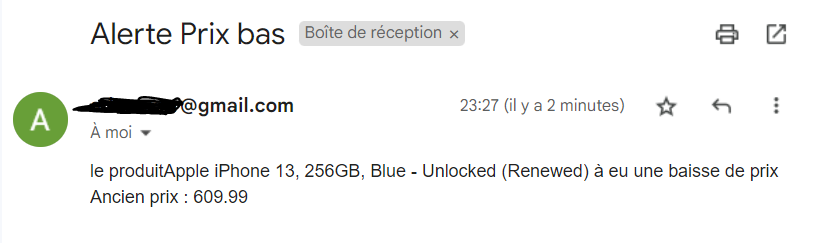

In [15]:
df = pd.read_csv(r'C:\Users\adanz\Desktop\programme perso\Python\WebScrapping\AmazonWebscrapper.csv')
print(df) #affiche le fichier csv dans le terminal 

                                               Title  Price        Date
0  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
1  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
2  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
3  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
4  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
5  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
6  Apple iPhone 13, 256GB, Blue - Unlocked (Renewed)  800.0  2022-08-30
